# Bibliotecas & DataFrame

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from geopy.geocoders import Nominatim
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import time 
import datetime
from datetime import datetime
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from lightgbm import LGBMClassifier

C:\Users\yukar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\yukar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## DataFrame

In [2]:
rain = pd.read_csv('data/rain_data_aus.csv')

In [3]:
wind_1 = pd.read_csv('data/wind_table_01.csv')
wind_2 = pd.read_csv('data/wind_table_02.csv')
wind_3 = pd.read_csv('data/wind_table_03.csv')
wind_4 = pd.read_csv('data/wind_table_04.csv')
wind_5 = pd.read_csv('data/wind_table_05.csv')
wind_6 = pd.read_csv('data/wind_table_06.csv')
wind_7 = pd.read_csv('data/wind_table_07.csv')
wind_8 = pd.read_csv('data/wind_table_08.csv')
wind_1.columns = wind_3.columns
wind_2.columns = wind_3.columns
wind = wind_1.append(wind_2, ignore_index=True).append(wind_3, ignore_index=True).append(wind_3, ignore_index=True).append(wind_4, ignore_index=True).append(wind_5, ignore_index=True).append(wind_6, ignore_index=True).append(wind_7, ignore_index=True).append(wind_8, ignore_index=True)

# O Baseline
Baseline calculado a partir da regressão linear do dataframe 'Rain'.

## Tratamento

In [4]:
rain = rain.dropna()
rain['raintoday'] = rain['raintoday'].replace('No', 0).replace('Yes', 1)
rain['raintomorrow'] = rain['raintomorrow'].replace('No', 0).replace('Yes', 1)

In [5]:
X = rain[[ 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'temp', 'humidity', 'precipitation3pm','modelo_vigente', 'amountOfRain',
       'precipitation9am']]
y = rain['raintomorrow']
model = LogisticRegression(max_iter=10000)
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
model.score(X, y)

0.9997092929358183

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)

In [8]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
model.score(X_test, y_test)

0.9993539912573484

In [10]:
model.score(X_train, y_train)

0.9992893597777635

# Overfitting
Tratar o dataframe pois deu overfitting no modelo anterior.

In [11]:
rain.corr().style.background_gradient(cmap='coolwarm')

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
mintemp,1.000000,0.743674,0.110846,0.510004,0.070680,-0.177758,0.076333,-0.475451,-0.491435,0.115204,0.050917,0.905552,0.720796,0.051478,0.142911,0.088964,0.578773,0.068579,0.003508,-0.001382,0.135744
maxtemp,0.743674,1.000000,-0.069482,0.652247,0.461698,-0.496329,-0.448043,-0.355855,-0.454047,-0.262003,-0.253183,0.890743,0.984101,-0.220012,-0.015487,-0.144498,0.779778,-0.406402,0.003385,-0.001055,-0.212616
rainfall,0.110846,-0.069482,1.000000,-0.074049,-0.243738,0.258127,0.270421,-0.177673,-0.133452,0.215699,0.191743,0.014438,-0.073640,0.553481,0.302723,0.253773,-0.060093,0.247128,-0.007556,-0.003066,0.371184
evaporation,0.510004,0.652247,-0.074049,1.000000,0.366577,-0.554104,-0.414895,-0.304406,-0.330799,-0.192775,-0.196180,0.598609,0.631686,-0.213291,-0.042126,-0.127257,0.509947,-0.375537,0.007043,-0.000189,-0.183537
sunshine,0.070680,0.461698,-0.243738,0.366577,1.000000,-0.498855,-0.622767,0.035783,-0.027949,-0.678801,-0.704871,0.285678,0.483256,-0.327720,-0.298182,-0.449261,0.359295,-0.565134,-0.003376,0.004404,-0.643104
humidity9am,-0.177758,-0.496329,0.258127,-0.554104,-0.498855,1.000000,0.679847,0.122421,0.178441,0.432826,0.344565,-0.426737,-0.487789,0.371288,0.177473,0.265360,-0.388460,0.617538,-0.003913,-0.001670,0.392692
humidity3pm,0.076333,-0.448043,0.270421,-0.414895,-0.622767,0.679847,1.000000,-0.057837,0.028653,0.507677,0.507461,-0.148491,-0.498921,0.376480,0.309910,0.447742,-0.351533,0.907959,-0.003120,-0.003777,0.644851
pressure9am,-0.475451,-0.355855,-0.177673,-0.304406,0.035783,0.122421,-0.057837,1.000000,0.961926,-0.142788,-0.164998,-0.447688,-0.314549,-0.183468,-0.174923,-0.255934,-0.274905,-0.052670,-0.002484,0.003967,-0.371539
pressure3pm,-0.491435,-0.454047,-0.133452,-0.330799,-0.027949,0.178441,0.028653,0.961926,1.000000,-0.074193,-0.101631,-0.500713,-0.422233,-0.100839,-0.174031,-0.231428,-0.351972,0.025834,-0.002560,0.004046,-0.322904
cloud9am,0.115204,-0.262003,0.215699,-0.192775,-0.678801,0.432826,0.507677,-0.142788,-0.074193,1.000000,0.612633,-0.101916,-0.278856,0.297414,0.204768,0.319410,-0.203947,0.460164,-0.000451,-0.000973,0.473697


Vamos ter que tirar o Amount of Rain e o Modelo Vigente,pois está diretamente relacionado ao overfitting.

In [12]:
X = rain[[ 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'temp', 'humidity', 'precipitation3pm','precipitation9am']]
y = rain['raintomorrow']
model = LogisticRegression(max_iter=10000)
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
model.score(X, y)

0.8372847960205433

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
model.score(X_train, y_train)

0.8360359196330512

In [15]:
model.score(X_test, y_test)

0.8377010702211504

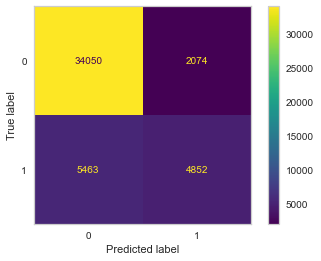

In [16]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')
plt.grid(False)

Taxa de acerto e a taxa de captura está quanto ?

In [17]:
print('Taxa de acerto:', + precision_score(y, model.predict(X)))
print('Taxa de captura:', + recall_score(y, model.predict(X)))

Taxa de acerto: 0.7020218401989404
Taxa de captura: 0.47009846510280917


## Aumentar a taxe de acertos

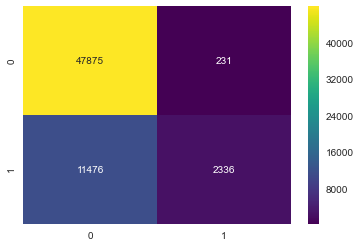

In [18]:
y_pred = model.predict_proba(X)[:, 1] > 0.8
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='viridis', fmt="d", annot_kws={'verticalalignment':'top'})

Taxa de acerto e a taxa de captura ficou em quanto ?

In [19]:
print('Taxa de acerto:', + precision_score(y, model.predict(X)))
print('Taxa de captura:', + recall_score(y, model.predict(X)))

Taxa de acerto: 0.7020218401989404
Taxa de captura: 0.47009846510280917


## Diminuir a taca de acertos

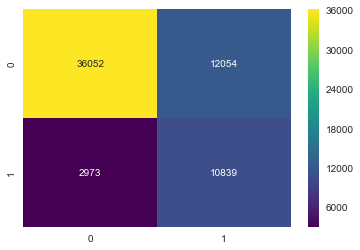

In [20]:
y_pred = model.predict_proba(X)[:, 1] > 0.2
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='viridis', fmt="d")

Taxa de acerto e a taxa de captura ficou em quanto ?

In [21]:
print('Taxa de acerto:', + precision_score(y, model.predict(X)))
print('Taxa de captura:', + recall_score(y, model.predict(X)))

Taxa de acerto: 0.7020218401989404
Taxa de captura: 0.47009846510280917


Se quer aumentar a taxa de acerto, a taxa de captura diminui.

Se quiser aumentar a taxa de captura, a taxa de acerto diminui.



# Mesclar dataframes
Tentativa de mesclar os dataframes para melhorar o modelo

In [22]:
df = rain.merge(wind, on=['date','location'], how='left').drop_duplicates().drop(columns=['date', 'location']).fillna(0)

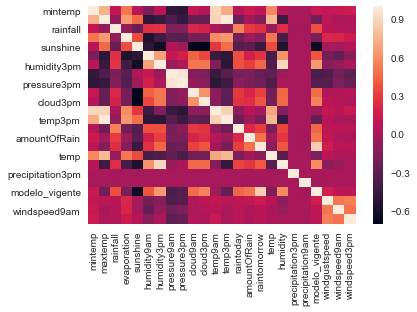

In [23]:
sns.heatmap(df.corr())

## Regressão Logística com a velocidade dos ventos

In [24]:
X = df[['windgustspeed', 'windspeed9am','windspeed3pm']]
y = df['raintomorrow']
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
model.score(X, y)

0.7777059982557576

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
model.score(X_train, y_train)

0.7746624458944377

In [27]:
model.score(X_test, y_test)

0.7787204720170546

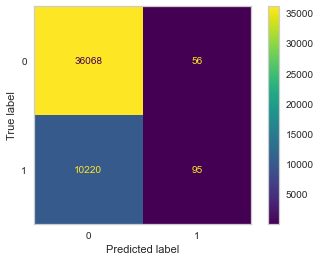

In [28]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')
plt.grid(False)

Taxa de acerto e a taxa de captura ficou em quanto ?

In [29]:
print('Taxa de acerto:', + precision_score(y, model.predict(X)))
print('Taxa de captura:', + recall_score(y, model.predict(X)))

Taxa de acerto: 0.6224489795918368
Taxa de captura: 0.008832898928468


## Dummies

In [30]:
dfd = pd.get_dummies(df)

In [31]:
X = dfd[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_0', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E',
       'winddir9am_ENE', 'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE',
       'winddir9am_NNE', 'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S',
       'winddir9am_SE', 'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW',
       'winddir9am_W', 'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_0',
       'winddir3pm_E', 'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N',
       'winddir3pm_NE', 'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW',
       'winddir3pm_S', 'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW',
       'winddir3pm_SW', 'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
y = dfd['raintomorrow']
model = LogisticRegression(max_iter=10000)
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
model.score(X, y)

0.8517070964824445

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
model.score(X_train, y_train)

0.8494088765424123

In [34]:
model.score(X_test, y_test)

0.8524731368031181

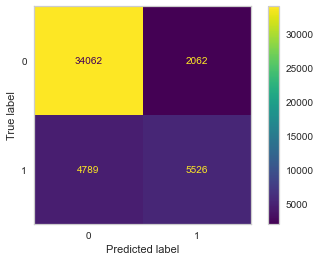

In [35]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')
plt.grid(False)

In [36]:
print('Taxa de acerto:', + precision_score(y, model.predict(X)))
print('Taxa de captura:', + recall_score(y, model.predict(X)))

Taxa de acerto: 0.7288453934361407
Taxa de captura: 0.5338111786852012


## Cotovelos

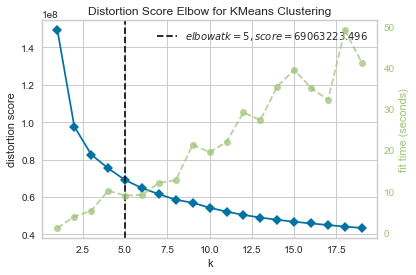

In [37]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(dfd)
visualizer.show()

In [38]:
model = KMeans(n_clusters=5)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
dfd['labels'] = model.labels_

In [40]:
modelo = LogisticRegression(max_iter=10000)

## Mascaras

In [41]:
mask = dfd['labels'] == 0
X = dfd[mask].drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente', 'labels']) 
y = dfd[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
modelo.score(X,y)

0.8012533022055661

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.7994593266158762

In [44]:
modelo.score(X_test, y_test)

0.80185124508519

**Fazer função para colocar labels nos 5**

# Não dropar o NaN do 'Rain'
Como foi dropado os missings do DataFrame 'Rain', dessa vez vamos tentar substituir eles por 0

## Ler o dataframe e tratar

In [45]:
rain = pd.read_csv('data/rain_data_aus.csv')
rain.fillna(0)
rain['raintoday'] = rain['raintoday'].replace('No', 0).replace('Yes', 1)
rain['raintomorrow'] = rain['raintomorrow'].replace('No', 0).replace('Yes', 1)

## Mesclar dataframes

In [46]:
df = rain.merge(wind, on=['date','location'], how='left').drop_duplicates().drop(columns=['date', 'location']).fillna(0)

## Dummies

In [47]:
df = pd.get_dummies(df)

In [48]:
df = df.sample(10000)

In [49]:
df.head()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,winddir3pm_NNW,winddir3pm_NW,winddir3pm_S,winddir3pm_SE,winddir3pm_SSE,winddir3pm_SSW,winddir3pm_SW,winddir3pm_W,winddir3pm_WNW,winddir3pm_WSW
19710,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59141,7.3,18.8,0.0,0.7,3.4,65.0,51.0,1024.3,1021.1,8.0,...,0,0,0,0,0,0,0,0,0,0
13439,18.6,28.2,0.0,6.6,0.0,0.0,0.0,1018.3,1016.7,6.0,...,0,0,0,0,0,0,0,0,0,0
128799,10.2,31.4,0.0,4.0,7.3,48.0,23.0,1018.5,1013.6,6.0,...,0,0,0,0,0,0,0,0,0,0
101250,13.6,22.8,2.4,5.0,3.7,100.0,60.0,1012.2,1010.4,8.0,...,0,0,0,0,0,1,0,0,0,0


## Cotovelos

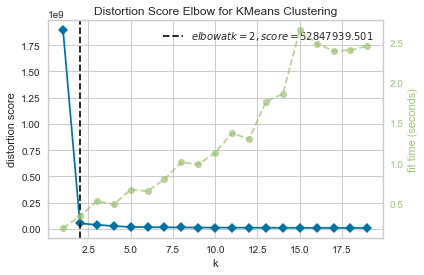

In [50]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(df.drop(columns=['raintomorrow']))
visualizer.show()

In [51]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'windgustdir_0',
       'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE', 'windgustdir_N',
       'windgustdir_NE', 'windgustdir_NNE', 'windgustdir_NNW',
       'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE', 'windgustdir_SSE',
       'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW',
       'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E', 'winddir9am_ENE',
       'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE',
       'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE',
       'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W',
       'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_0', 'winddir3pm_E',
       'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N', 'winddir3pm_NE',
       'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW', 'winddir3pm_S',
       'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW', 'winddir3pm_SW',
       'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
model = KMeans(n_clusters=2, n_jobs=-1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
df['labels'] = model.labels_

## Labels

### Labels == 0

In [53]:
modelo = LogisticRegression(max_iter=10000)

In [54]:
mask = df['labels'] == 0
X = df[mask].drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente'])
y = df[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
modelo.score(X,y)

0.8420818505338078

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8425266903914591

In [57]:
modelo.score(X_test, y_test)

0.8419335705812574

In [58]:
pandas = pd.DataFrame(zip(modelo.coef_ [0], X.columns), columns=['Coef', 'Var']).sort_values(by='Coef')
pandas

,Coef,Var
67,-0.456642,winddir3pm_SSW
60,-0.417633,winddir3pm_NE
41,-0.375582,winddir9am_ESE
32,-0.356915,windgustdir_SSE
30,-0.308334,windgustdir_S
...,...,...
70,0.386915,winddir3pm_WNW
44,0.574509,winddir9am_NNE
13,0.616289,raintoday
55,0.656465,winddir3pm_0


In [59]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.719225449515906
Taxa de captura: 0.5063291139240507


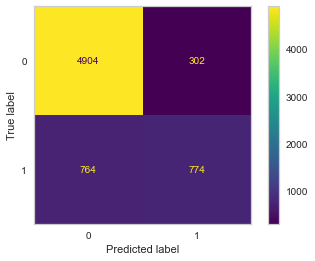

In [60]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f')
plt.grid(False)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


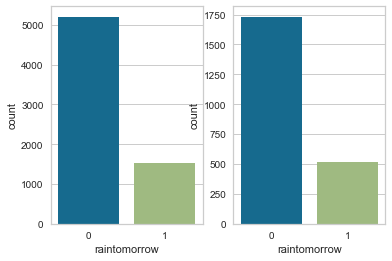

In [61]:
fig, ax =plt.subplots(1,2)
sns.countplot(y_test, ax=ax[0])
sns.countplot(y_train, ax=ax[1])
fig.show()

### Labels == 1

In [62]:
mask1 = df['labels'] == 1
X = df[mask1].drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente'])
y = df[mask1]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
modelo.score(X,y)

0.8373015873015873

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8492063492063492

In [65]:
modelo.score(X_test, y_test)

0.8333333333333334

In [66]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7034482758620689
Taxa de captura: 0.45739910313901344


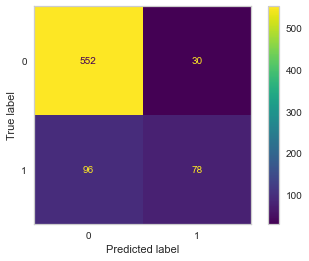

In [67]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f')
plt.grid(False)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


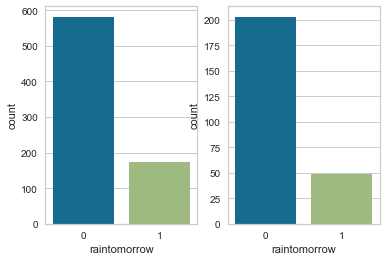

In [68]:
fig, ax =plt.subplots(1,2)
sns.countplot(y_test, ax=ax[0])
sns.countplot(y_train, ax=ax[1])
fig.show()

**O dataset está desbalanceado. Por exemplo: 1/3 do valor é que vai chover (1), então tem que ser equilibrados.**

# Balancear o DataFrame
Ao plotar a quantidade de dias de chuva, percebi que não estavam balanceados, então usei o UnderSampler para balancear.

In [69]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'windgustdir_0',
       'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE', 'windgustdir_N',
       'windgustdir_NE', 'windgustdir_NNE', 'windgustdir_NNW',
       'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE', 'windgustdir_SSE',
       'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW',
       'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E', 'winddir9am_ENE',
       'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE',
       'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE',
       'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W',
       'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_0', 'winddir3pm_E',
       'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N', 'winddir3pm_NE',
       'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW', 'winddir3pm_S',
       'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW', 'winddir3pm_SW',
       'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
y = df['raintomorrow']

In [70]:
rus = RandomUnderSampler(random_state=7)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [71]:
y_resampled.value_counts()

1    2277
0    2277
Name: raintomorrow, dtype: int64

## Regressão Logística

In [72]:
model = LogisticRegression(max_iter=10000)
model.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
model.score(X_resampled, y_resampled)

0.7758014931927976

In [74]:
precision_score(y_resampled, model.predict(X_resampled))

0.7778761061946903

## Cotovelos

In [75]:
X_resampled['raintomorrow'] = y_resampled
sample = X_resampled

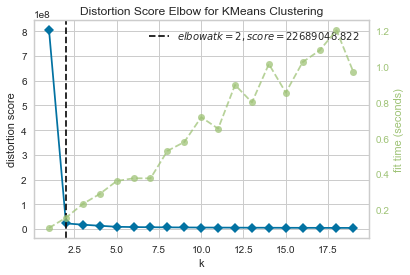

In [76]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(sample)
visualizer.show()

In [77]:
X = sample[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_0', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E',
       'winddir9am_ENE', 'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE',
       'winddir9am_NNE', 'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S',
       'winddir9am_SE', 'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW',
       'winddir9am_W', 'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_0',
       'winddir3pm_E', 'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N',
       'winddir3pm_NE', 'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW',
       'winddir3pm_S', 'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW',
       'winddir3pm_SW', 'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
y = sample['raintomorrow']

In [78]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
sample['labels'] = model.labels_

## Labels

### Labels == 0

In [80]:
mask = sample['labels'] == 0
X = sample[mask].drop(columns=['raintomorrow'])
y = sample[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
modelo.score(X,y)

0.7816816089168888

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.7904946653734238

In [83]:
modelo.score(X_test, y_test)

0.7787467700258398

In [84]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7832923832923833
Taxa de captura: 0.7760467380720545


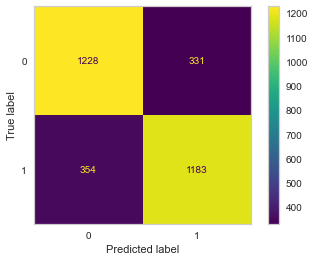

In [85]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f')
plt.grid(False)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


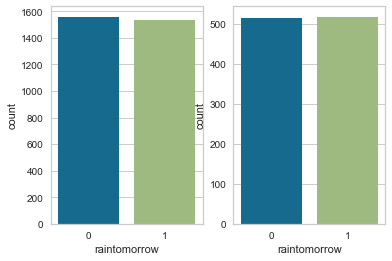

In [86]:
fig, ax =plt.subplots(1,2)
sns.countplot(y_test, ax=ax[0])
sns.countplot(y_train, ax=ax[1])
fig.show()

### Labels == 1

In [87]:
mask1 = sample['labels'] == 1
X = sample[mask1].drop(columns=['raintomorrow'])
y = sample[mask1]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
modelo.score(X,y)

0.7728337236533958

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8207547169811321

In [90]:
modelo.score(X_test, y_test)

0.7570093457943925

In [91]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7787610619469026
Taxa de captura: 0.7892376681614349


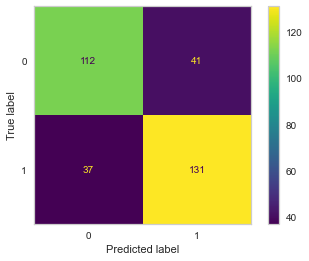

In [92]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f')
plt.grid(False)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


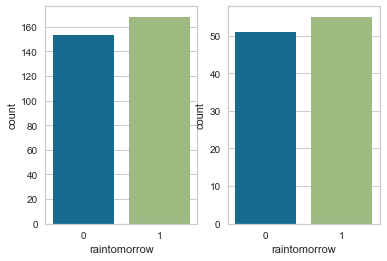

In [93]:
fig, ax =plt.subplots(1,2)
sns.countplot(y_test, ax=ax[0])
sns.countplot(y_train, ax=ax[1])
fig.show()

## KNN

In [94]:
X = sample[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_0', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E',
       'winddir9am_ENE', 'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE',
       'winddir9am_NNE', 'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S',
       'winddir9am_SE', 'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW',
       'winddir9am_W', 'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_0',
       'winddir3pm_E', 'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N',
       'winddir3pm_NE', 'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW',
       'winddir3pm_S', 'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW',
       'winddir3pm_SW', 'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
y = sample['raintomorrow']

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


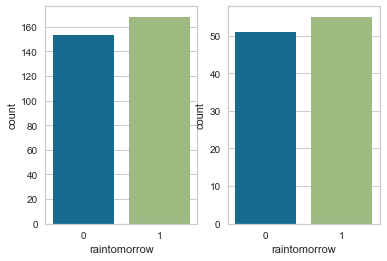

In [95]:
fig, ax =plt.subplots(1,2)
sns.countplot(y_test, ax=ax[0])
sns.countplot(y_train, ax=ax[1])
fig.show()

In [96]:
neigh = KNeighborsClassifier(n_neighbors=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [97]:
neigh.score(X_train, y_train)

0.8409490333919156

In [98]:
neigh.score(X_test, y_test)

0.6721311475409836

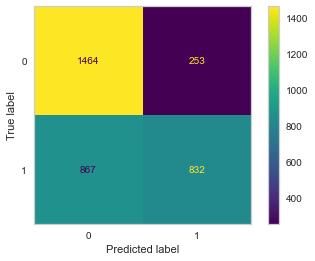

In [99]:
plot_confusion_matrix(neigh, X_test, y_test, values_format='.0f')
plt.grid(False)

In [100]:
print('Taxa de acerto:', + precision_score(y, neigh.predict(X)))
print('Taxa de captura:', + recall_score(y, neigh.predict(X)))

Taxa de acerto: 0.8292847503373819
Taxa de captura: 0.5397452788757137


## ROC

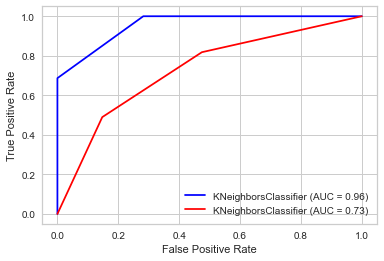

In [101]:
fig, ax = plt.subplots()
plot_roc_curve(neigh, X_train, y_train, color='blue', ax=ax)
plot_roc_curve(neigh, X_test, y_test, color='red', ax= ax)

# Usar todos os métodos até agora

## Dataframe

In [102]:
rain = pd.read_csv('data/rain_data_aus.csv')

In [103]:
rain['raintoday'] = rain['raintoday'].replace('No', 0).replace('Yes', 1)
rain['raintomorrow'] = rain['raintomorrow'].replace('No', 0).replace('Yes', 1)

In [104]:
wind_1 = pd.read_csv('data/wind_table_01.csv')
wind_2 = pd.read_csv('data/wind_table_02.csv')
wind_3 = pd.read_csv('data/wind_table_03.csv')
wind_4 = pd.read_csv('data/wind_table_04.csv')
wind_5 = pd.read_csv('data/wind_table_05.csv')
wind_6 = pd.read_csv('data/wind_table_06.csv')
wind_7 = pd.read_csv('data/wind_table_07.csv')
wind_8 = pd.read_csv('data/wind_table_08.csv')
wind_1.columns = wind_3.columns
wind_2.columns = wind_3.columns
wind = wind_1.append(wind_2, ignore_index=True).append(wind_3, ignore_index=True).append(wind_3, ignore_index=True).append(wind_4, ignore_index=True).append(wind_5, ignore_index=True).append(wind_6, ignore_index=True).append(wind_7, ignore_index=True).append(wind_8, ignore_index=True)

In [105]:
df = rain.merge(wind, on=['date','location'], how='left').drop_duplicates().drop(columns=['date', 'location'])

## Dummies

In [106]:
df = pd.get_dummies(df)

In [107]:
df.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'amountOfRain',
       'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE',
       'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE', 'windgustdir_NNW',
       'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE', 'windgustdir_SSE',
       'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW',
       'windgustdir_WSW', 'winddir9am_E', 'winddir9am_ENE', 'winddir9am_ESE',
       'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE', 'winddir9am_NNW',
       'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE', 'winddir9am_SSE',
       'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W', 'winddir9am_WNW',
       'winddir9am_W

In [108]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'amountOfRain',
       'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE',
       'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE', 'windgustdir_NNW',
       'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE', 'windgustdir_SSE',
       'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW',
       'windgustdir_WSW', 'winddir9am_E', 'winddir9am_ENE', 'winddir9am_ESE',
       'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE', 'winddir9am_NNW',
       'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE', 'winddir9am_SSE',
       'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W', 'winddir9am_WNW',
       'winddir9am_WSW', 'winddir3pm_E', 'winddir3pm_ENE', 'winddir3pm_ESE',
       'winddir3pm_N', 'winddir3pm_NE', 'winddir3pm_NNE', 'winddir3pm_NNW',
       'winddir3pm_NW', 'winddir3pm_S', 'winddir3pm_SE', 'winddir3pm_SSE',
       'winddir3pm_SSW', 'winddir3pm_SW', 'winddir3pm_W', 'winddir3pm_WNW',
       'winddir3pm_WSW']]
y = df['raintomorrow']

## Balancear DataFrame

In [109]:
rus = RandomUnderSampler(random_state=7)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [110]:
df = X_resampled
df['raintomorrow'] = y_resampled

## KNNImputer

In [111]:
imputer = KNNImputer(n_neighbors=2)

In [112]:
df = pd.DataFrame(imputer.fit_transform(X_resampled), columns=X_resampled.columns)

In [113]:
df['raintomorrow'] = y_resampled

In [115]:
X = df.drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente'])
y = df['raintomorrow']

In [116]:
df.to_csv('weather_knn.csv')

## Standardizar

In [117]:
scaler = StandardScaler()

In [118]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [119]:
dfs=pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [120]:
dfs['raintomorrow'] = df['raintomorrow']

## Regressão Logística

In [122]:
modelo = LogisticRegression(max_iter=10000, n_jobs=-1)

In [123]:
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
modelo.score(X,y)

0.7913228973868306

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.7889321119337432

In [126]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7972536090394033
Taxa de captura: 0.7813470527339461


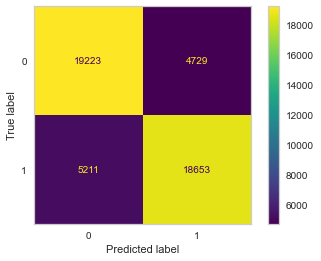

In [127]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f')
plt.grid(False)

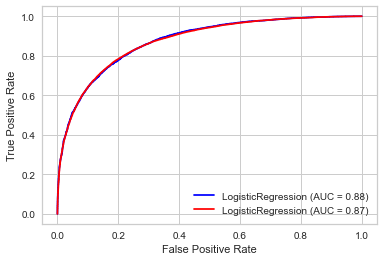

In [128]:
fig, ax = plt.subplots()
plot_roc_curve(modelo, X_train, y_train, color='blue', ax=ax)
plot_roc_curve(modelo, X_test, y_test, color='red', ax= ax)

## Cotovelo, KMeans e Regressão Logística

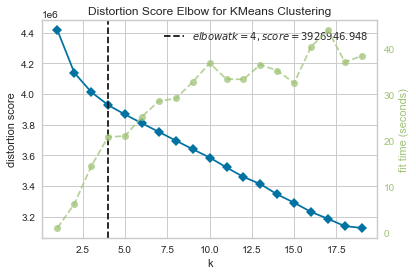

In [129]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(dfs)
visualizer.show()

In [130]:
model = KMeans(n_clusters=4, n_jobs=-1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [131]:
dfs['labels'] = model.labels_

### Labels == 0

In [132]:
mask = dfs['labels'] == 0
X = dfs[mask].drop(columns=['raintomorrow'])
y = dfs[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
modelo.score(X,y)

0.8588550151268327

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8580404933674657

### Labels == 1

In [135]:
mask = dfs['labels'] == 1
X = dfs[mask].drop(columns=['raintomorrow'])
y = dfs[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
modelo.score(X,y)

0.8464324520101413

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8481599536366271

In [138]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7144934561318468
Taxa de captura: 0.49051580698835273


### Labels == 2

In [139]:
mask = dfs['labels'] == 2
X = dfs[mask].drop(columns=['raintomorrow'])
y = dfs[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
modelo.score(X,y)

0.7674261499723638

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.7675675675675676

In [142]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.6727732154137713
Taxa de captura: 0.4363859864781807


### Labels == 3

In [143]:
mask = dfs['labels'] == 3
X = dfs[mask].drop(columns=['raintomorrow'])
y = dfs[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
modelo.score(X,y)

0.7297608933122952

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.7356154406409323

In [146]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7516194331983805
Taxa de captura: 0.7879045092838196


# Geolocalização
Já que com os dados anteriores não cheguei em um resultado desejado, decidi colocar a geolocalização para ver o impacto.

## DataFrame

In [2]:
rain = pd.read_csv('data/rain_data_aus.csv')
rain['raintoday'] = rain['raintoday'].replace('No', 0).replace('Yes', 1)
rain['raintomorrow'] = rain['raintomorrow'].replace('No', 0).replace('Yes', 1)
wind_1 = pd.read_csv('data/wind_table_01.csv')
wind_2 = pd.read_csv('data/wind_table_02.csv')
wind_3 = pd.read_csv('data/wind_table_03.csv')
wind_4 = pd.read_csv('data/wind_table_04.csv')
wind_5 = pd.read_csv('data/wind_table_05.csv')
wind_6 = pd.read_csv('data/wind_table_06.csv')
wind_7 = pd.read_csv('data/wind_table_07.csv')
wind_8 = pd.read_csv('data/wind_table_08.csv')
wind_1.columns = wind_3.columns
wind_2.columns = wind_3.columns
wind = wind_1.append(wind_2, ignore_index=True).append(wind_3, ignore_index=True).append(wind_3, ignore_index=True).append(wind_4, ignore_index=True).append(wind_5, ignore_index=True).append(wind_6, ignore_index=True).append(wind_7, ignore_index=True).append(wind_8, ignore_index=True)

In [3]:
df = rain.merge(wind, on=['date','location'], how='left').drop_duplicates()

## Geolocalização

In [4]:
df['location'] = df['location'].replace('NorfolkIsland', 'Norfolk Island').replace('MountGambier', 'Mount Gambier')
df['location'] = df['location'].replace('SydneyAirport', 'Sydney Airport').replace('MountGinini', 'Mount Ginini')
df['location'] = df['location'].replace('PerthAirport', 'Perth Airport').replace('AliceSprings', 'Alice Springs')
df['location'] = df['location'].replace('NorahHead', 'Norah Head').replace('WaggaWagga', 'Wagga Wagga')
df['location'] = df['location'].replace('BadgerysCreek', 'Badgerys Creek').replace('PearceRAAF', 'Pearce RAAF')
df['location'] = df['location'].replace('GoldCoast', 'Gold Coast').replace('SalmonGums', 'Salmon Gums')
df['location'] = df['location'].replace('MelbourneAirport', 'Melbourne Airport').replace('CoffsHarbour', 'Coffs Harbour')

In [5]:
local = df[['location']].drop_duplicates().reset_index().drop(columns=['index'])

In [6]:
local['latitude'] = float(0)
local['longitude'] = float(0)

In [7]:
geolocator = Nominatim(timeout=10)
for item in tqdm(range(0,49)):
    location = geolocator.geocode(local['location'][item] + ', Australia')
    local['latitude'][item]= location.latitude
    local['longitude'][item]=location.longitude

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.
  0%|          | 0/49 [00:00<?, ?it/s]C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\yukar\Anaconda3\lib

In [8]:
df['latitude'] = float(0)
df['longitude'] = float(0)

In [9]:
df = df.merge(local, on=['location'], how='left')
df.to_csv('Geolocalização.csv')

In [10]:
df = pd.read_csv('Geolocalização.csv')

In [11]:
df

,Unnamed: 0,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,...,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,latitude_x,longitude_x,latitude_y,longitude_y
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,...,W,44.0,W,WNW,20.0,24.0,0.0,0.0,-36.080477,146.916280
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,...,WNW,44.0,NNW,WSW,4.0,22.0,0.0,0.0,-36.080477,146.916280
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,...,WSW,46.0,W,WSW,19.0,26.0,0.0,0.0,-36.080477,146.916280
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,...,NE,24.0,SE,E,11.0,9.0,0.0,0.0,-36.080477,146.916280
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,...,W,41.0,ENE,NW,7.0,20.0,0.0,0.0,-36.080477,146.916280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,...,E,31.0,ESE,E,15.0,13.0,0.0,0.0,-25.345555,131.036961
142189,142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,...,E,31.0,SE,ENE,13.0,11.0,0.0,0.0,-25.345555,131.036961
142190,142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,...,NNW,22.0,SE,N,13.0,9.0,0.0,0.0,-25.345555,131.036961
142191,142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,...,N,37.0,SE,WNW,9.0,9.0,0.0,0.0,-25.345555,131.036961


In [12]:
df = df.drop(columns=['date','location','latitude_x','longitude_x']).rename(columns={'latitude_y':'latitude', 'longitude_y':'longitude'})

## Dummies

In [13]:
df = pd.get_dummies(df)

## Balancear DataFrame

In [14]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'amountOfRain', 'temp',
       'humidity', 'precipitation3pm', 'precipitation9am', 'modelo_vigente',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'latitude',
       'longitude', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_E', 'winddir9am_ENE',
       'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE',
       'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE',
       'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W',
       'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_E', 'winddir3pm_ENE',
       'winddir3pm_ESE', 'winddir3pm_N', 'winddir3pm_NE', 'winddir3pm_NNE',
       'winddir3pm_NNW', 'winddir3pm_NW', 'winddir3pm_S', 'winddir3pm_SE',
       'winddir3pm_SSE', 'winddir3pm_SSW', 'winddir3pm_SW', 'winddir3pm_W',
       'winddir3pm_WNW', 'winddir3pm_WSW']]
y = df['raintomorrow']

In [15]:
rus = RandomUnderSampler(random_state=7)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [16]:
df = X_resampled
df['raintomorrow'] = y_resampled

## KNNImputer

In [17]:
imputer = KNNImputer(n_neighbors=2)

In [18]:
df = pd.DataFrame(imputer.fit_transform(X_resampled), columns=X_resampled.columns)

In [19]:
df['raintomorrow'] = y_resampled

In [20]:
X = df.drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente'])
y = df['raintomorrow']

In [21]:
df.to_csv('geo_knn.csv')

## Standardizar

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
dfs=pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [25]:
dfs['raintomorrow'] = df['raintomorrow']

## Regressão Logística

In [26]:
X = dfs[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'temp',
       'humidity', 'precipitation3pm', 'precipitation9am',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'latitude',
       'longitude', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_E', 'winddir9am_ENE',
       'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE',
       'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE',
       'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W',
       'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_E', 'winddir3pm_ENE',
       'winddir3pm_ESE', 'winddir3pm_N', 'winddir3pm_NE', 'winddir3pm_NNE',
       'winddir3pm_NNW', 'winddir3pm_NW', 'winddir3pm_S', 'winddir3pm_SE',
       'winddir3pm_SSE', 'winddir3pm_SSW', 'winddir3pm_SW', 'winddir3pm_W',
       'winddir3pm_WNW', 'winddir3pm_WSW']]
y = dfs['raintomorrow']

In [27]:
modelo = LogisticRegression(max_iter=10000, n_jobs=-1)

In [28]:
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
modelo.score(X,y)

0.7937070615177086

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.7938260760446731

In [31]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7979505457785698
Taxa de captura: 0.786585939705744


## Cotovelo, KMeans e Regressão Logística

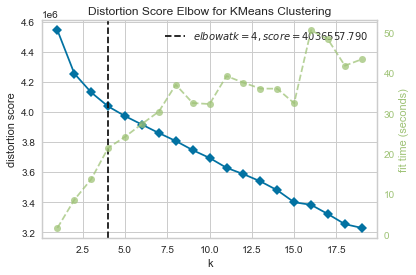

In [32]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(dfs)
visualizer.show()

In [33]:
model = KMeans(n_clusters=4, n_jobs=-1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
dfs['labels'] = model.labels_

### Labels == 0

In [37]:
dfs

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,winddir3pm_S,winddir3pm_SE,winddir3pm_SSE,winddir3pm_SSW,winddir3pm_SW,winddir3pm_W,winddir3pm_WNW,winddir3pm_WSW,raintomorrow,labels
0,1.809594,1.989408,-0.337178,1.730323,0.943357,-3.233349,-2.333216,-0.753508,-1.097363,-1.190480,...,-0.268530,-0.279644,-0.255297,-0.244491,-0.257278,-0.277912,-0.266645,-0.263766,0,0
1,0.230657,-0.557927,-0.318886,0.312334,-0.116201,-1.083026,0.103980,-0.048176,-0.050063,0.836362,...,-0.268530,-0.279644,-0.255297,-0.244491,3.886853,-0.277912,-0.266645,-0.263766,0,1
2,-0.379031,-0.445338,-0.209138,-0.314853,0.453311,-0.599203,-0.999656,1.431638,1.527869,-0.084930,...,-0.268530,-0.279644,-0.255297,4.090128,-0.257278,-0.277912,-0.266645,-0.263766,0,1
3,-0.082003,-0.332748,-0.337178,-0.942040,-0.990336,0.422200,0.241934,-1.071599,-0.510875,1.204878,...,3.723977,-0.279644,-0.255297,-0.244491,-0.257278,-0.277912,-0.266645,-0.263766,0,3
4,-0.035104,1.046472,-0.337178,0.285065,1.512869,-0.599203,-1.505489,0.906096,0.717957,-0.637705,...,-0.268530,-0.279644,-0.255297,4.090128,-0.257278,-0.277912,-0.266645,-0.263766,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63749,1.919025,2.439766,-0.300595,1.484902,0.691712,-1.835639,-1.551474,-1.334370,-1.502318,0.283587,...,-0.268530,-0.279644,-0.255297,-0.244491,-0.257278,-0.277912,-0.266645,-0.263766,1,0
63750,1.059208,0.272420,-0.337178,0.884984,1.552602,-2.373220,1.529509,-0.103496,-0.064027,1.204878,...,-0.268530,-0.279644,3.917013,-0.244491,-0.257278,-0.277912,-0.266645,-0.263766,1,3
63751,0.418254,-0.135717,0.284730,-0.151239,-0.632735,-0.384171,0.333904,0.034804,0.131469,-0.637705,...,-0.268530,-0.279644,-0.255297,-0.244491,-0.257278,-0.277912,-0.266645,-0.263766,1,3
63752,0.809080,0.624262,0.815181,-0.969309,-0.301624,1.121055,0.057995,0.200764,0.047685,0.836362,...,-0.268530,-0.279644,-0.255297,4.090128,-0.257278,-0.277912,-0.266645,-0.263766,1,3


In [39]:
mask = dfs['labels'] == 0
X = dfs[mask].drop(columns=['raintomorrow', 'labels'])
y = dfs[mask]['raintomorrow']
model.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
modelo.score(X,y)

0.8048427900252981

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8079518072289157

In [43]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.6881331403762663
Taxa de captura: 0.444392523364486


### Labels == 1

In [44]:
mask = dfs['labels'] == 1
X = dfs[mask].drop(columns=['raintomorrow', 'labels'])
y = dfs[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
modelo.score(X,y)

0.7749216300940439

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.7811912225705329

In [47]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.6872322193658955
Taxa de captura: 0.5297225891677675


### Labels == 2

In [48]:
mask = dfs['labels'] == 2
X = dfs[mask].drop(columns=['raintomorrow', 'labels'])
y = dfs[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
modelo.score(X,y)

0.8265341823525295

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8267077267637178

In [51]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.850776612181833
Taxa de captura: 0.9420133261300198


### Labels == 3

In [52]:
mask = dfs['labels'] == 3
X = dfs[mask].drop(columns=['raintomorrow', 'labels'])
y = dfs[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
modelo.score(X,y)

0.7987027184607536

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.8046647230320699

In [55]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.8287771017225126
Taxa de captura: 0.9267848586487781


# Tudo!
Mesmo usando a geolocalização, não alterou o resultado. Então coloquei os meses para verificar o impacto.

## DataFrame

In [56]:
df = pd.read_csv('Geolocalização.csv').drop(columns=['Unnamed: 0'])

In [57]:
df = df.drop(columns=['location','latitude_x','longitude_x']).rename(columns={'latitude_y':'latitude', 'longitude_y':'longitude'})

In [58]:
df['month'] = 0
for item in tqdm(range(0,142193)):
    date = datetime.strptime(df['date'][item],"%Y-%m-%d").date()
    df['month'][item] = date.month

  0%|          | 0/142193 [00:00<?, ?it/s]C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
100%|██████████| 142193/142193 [01:00<00:00, 2333.77it/s]


In [59]:
df = df.drop(columns=['date'])

In [60]:
df.to_csv('date_geo.csv')

In [61]:
df = pd.read_csv('date_geo.csv').drop(columns=['Unnamed: 0'])

In [62]:
df

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,modelo_vigente,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,latitude,longitude,month
0,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,...,0.089825,W,44.0,W,WNW,20.0,24.0,-36.080477,146.916280,12
1,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,...,0.023477,WNW,44.0,NNW,WSW,4.0,22.0,-36.080477,146.916280,12
2,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,...,0.027580,WSW,46.0,W,WSW,19.0,26.0,-36.080477,146.916280,12
3,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,...,0.023962,NE,24.0,SE,E,11.0,9.0,-36.080477,146.916280,12
4,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,...,0.220164,W,41.0,ENE,NW,7.0,20.0,-36.080477,146.916280,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,1021.2,NaN,...,0.002556,E,31.0,ESE,E,15.0,13.0,-25.345554,131.036961,6
142189,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,1020.3,NaN,...,0.002053,E,31.0,SE,ENE,13.0,11.0,-25.345554,131.036961,6
142190,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,1019.1,NaN,...,0.023350,NNW,22.0,SE,N,13.0,9.0,-25.345554,131.036961,6
142191,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,1016.8,NaN,...,0.007195,N,37.0,SE,WNW,9.0,9.0,-25.345554,131.036961,6


## Dummies

In [63]:
df = pd.get_dummies(df)

## Balancear DataFrame

In [64]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'amountOfRain',
       'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'latitude', 'longitude', 'month', 'windgustdir_E',
       'windgustdir_ENE', 'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE',
       'windgustdir_NNE', 'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S',
       'windgustdir_SE', 'windgustdir_SSE', 'windgustdir_SSW',
       'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW', 'windgustdir_WSW',
       'winddir9am_E', 'winddir9am_ENE', 'winddir9am_ESE', 'winddir9am_N',
       'winddir9am_NE', 'winddir9am_NNE', 'winddir9am_NNW', 'winddir9am_NW',
       'winddir9am_S', 'winddir9am_SE', 'winddir9am_SSE', 'winddir9am_SSW',
       'winddir9am_SW', 'winddir9am_W', 'winddir9am_WNW', 'winddir9am_WSW',
       'winddir3pm_E', 'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N',
       'winddir3pm_NE', 'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW',
       'winddir3pm_S', 'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW',
       'winddir3pm_SW', 'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
y = df['raintomorrow']

In [65]:
rus = RandomUnderSampler(random_state=7)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [66]:
df = X_resampled
df['raintomorrow'] = y_resampled

In [67]:
df.to_csv('vai.csv')

## Standardizar

In [68]:
df = pd.read_csv('vai.csv').drop(columns=['Unnamed: 0'])

In [70]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'amountOfRain', 'temp',
       'humidity', 'precipitation3pm', 'precipitation9am', 'modelo_vigente',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'latitude',
       'longitude', 'month', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_E', 'winddir9am_ENE',
       'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE',
       'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE',
       'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W',
       'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_E', 'winddir3pm_ENE',
       'winddir3pm_ESE', 'winddir3pm_N', 'winddir3pm_NE', 'winddir3pm_NNE',
       'winddir3pm_NNW', 'winddir3pm_NW', 'winddir3pm_S', 'winddir3pm_SE',
       'winddir3pm_SSE', 'winddir3pm_SSW', 'winddir3pm_SW', 'winddir3pm_W',
       'winddir3pm_WNW', 'winddir3pm_WSW']]

In [71]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
dfs=pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)
dfs['raintomorrow'] = df['raintomorrow']
dfs['month'] = df['month']

## KNNImputer

In [110]:
imputer = KNNImputer(n_neighbors=2)

In [111]:
df = pd.DataFrame(imputer.fit_transform(dfs.drop(columns='raintomorrow')), columns=dfs.drop(columns='raintomorrow').columns)

In [112]:
df['raintomorrow'] = dfs['raintomorrow']

In [113]:
X = df.drop(columns=['raintomorrow', 'modelo_vigente', 'amountOfRain'])
y = df['raintomorrow']

In [114]:
df.to_csv('date_geo_knn.csv')

## Regressão Logística

In [151]:
df = pd.read_csv('date_geo_knn.csv').drop(columns=['Unnamed: 0'])

In [152]:
X = df.drop(columns=['raintomorrow', 'modelo_vigente', 'amountOfRain'])
y = df['raintomorrow']

In [153]:
modelo = LogisticRegression(max_iter=10000, n_jobs=-1)

In [154]:
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
modelo.score(X,y)

0.790962135709132

In [156]:
print('Taxa de acerto:', + precision_score(y, modelo.predict(X)))
print('Taxa de captura:', + recall_score(y, modelo.predict(X)))

Taxa de acerto: 0.7965532676812892
Taxa de captura: 0.7815352762179628


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_train, y_train)

0.788681139415234

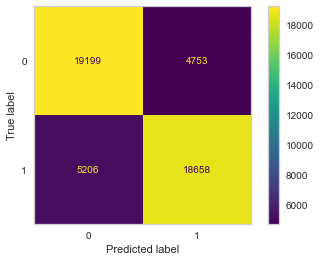

In [158]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f')
plt.grid(False)

## Ensemble Methods

### Tree

In [187]:
X = df.drop(columns=['raintomorrow', 'modelo_vigente', 'amountOfRain'])
y = df['raintomorrow']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [189]:
tree = DecisionTreeClassifier(max_depth=2)

results = cross_val_score(tree, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.7888707211218293, 0.006544121102348009)

In [208]:
tree.fit(X, y)
print('Taxa de acerto:', + precision_score(y, tree.predict(X)))
print('Taxa de captura:', + recall_score(y, tree.predict(X)))

Taxa de acerto: 0.7826487677820076
Taxa de captura: 0.6126988110549926


In [190]:
tree.fit(X_train, y_train)
pd.DataFrame(zip(tree.feature_importances_, X_train.columns), columns=['importance','variable']).sort_values(by='importance')

,importance,variable
0,0.000000,mintemp
51,0.000000,winddir9am_SSW
50,0.000000,winddir9am_SSE
49,0.000000,winddir9am_SE
48,0.000000,winddir9am_S
...,...,...
20,0.000000,windspeed3pm
26,0.000000,windgustdir_ESE
71,0.000000,winddir3pm_WSW
4,0.155583,sunshine


### Bagging

In [191]:
bagging = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=3), 
            n_estimators=100,
            oob_score=True
)

results = cross_val_score(bagging, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8418712939575427, 0.011487451645713073)

In [207]:
bagging.fit(X, y)
print('Taxa de acerto:', + precision_score(y, bagging.predict(X)))
print('Taxa de captura:', + recall_score(y, bagging.predict(X)))

Taxa de acerto: 0.7360392664001881
Taxa de captura: 0.7856134517049911


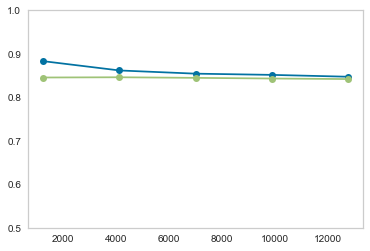

In [194]:
curves = learning_curve(bagging, X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

### Floresta Randômica

In [195]:
forest = RandomForestClassifier(max_depth=2, n_estimators=100, n_jobs=-1)

results = cross_val_score(forest, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8382453160282892, 0.014707257601409045)

In [209]:
forest.fit(X, y)
print('Taxa de acerto:', + precision_score(y, forest.predict(X)))
print('Taxa de captura:', + recall_score(y, forest.predict(X)))

Taxa de acerto: 0.7762007994038345
Taxa de captura: 0.7188568560404053


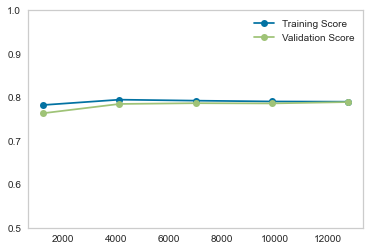

In [197]:
curves = learning_curve(tree, X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o', label='Validation Score');
plt.ylim([0.5, 1])
plt.legend()
plt.grid()

### Regressão Logística

In [198]:
logistic = LogisticRegression(max_iter=2000)

results = cross_val_score(logistic, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.8738976354521439, 0.007708855823801379)

In [210]:
logistic.fit(X, y)
print('Taxa de acerto:', + precision_score(y, logistic.predict(X)))
print('Taxa de captura:', + recall_score(y, logistic.predict(X)))

Taxa de acerto: 0.7965532676812892
Taxa de captura: 0.7815352762179628


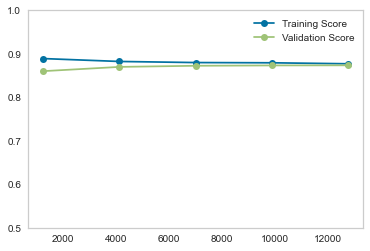

In [200]:
curves = learning_curve(LogisticRegression(max_iter=2000), X_train, y_train, scoring='roc_auc')

train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o', label='Validation Score');
plt.ylim([0.5, 1])
plt.legend()
plt.grid()

### Tree, Bagging e Logistic

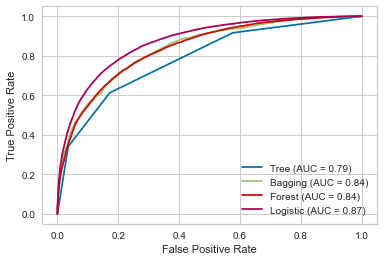

In [201]:
logistic = LogisticRegression(max_iter=2000).fit(X_train, y_train)
tree.fit(X_train, y_train)
bagging.fit(X_train, y_train)

fig, ax = plt.subplots()

plot_roc_curve(tree, X_test, y_test, name='Tree', ax=ax)
plot_roc_curve(bagging, X_test, y_test, name='Bagging', ax=ax)
plot_roc_curve(forest, X_test, y_test, name='Forest', ax=ax)
plot_roc_curve(logistic, X_test, y_test, name='Logistic', ax=ax)

## LightGBM

In [202]:
lgb = LGBMClassifier(max_depth=1, n_estimators=100, colsample_bytree=.7, n_jobs=-1)

In [203]:
results = cross_val_score(lgb, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
(np.mean(results), np.std(results))

(0.865094597846096, 0.008856914566944566)

In [204]:
lgb.fit(X_train, y_train)
print('Taxa de acerto:', + precision_score(y_train, logistic.predict(X_train)))
print('Taxa de captura:', + recall_score(y_train, logistic.predict(X_train)))

Taxa de acerto: 0.7978971962616822
Taxa de captura: 0.7788900152052711


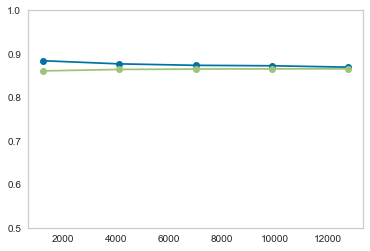

In [205]:
curves = learning_curve(lgb, X_train, y_train, scoring='roc_auc')
train_sizes = curves[0]
train_scores = curves[1]
test_scores = curves[2]

plt.plot(train_sizes, train_scores.mean(axis=1),'-o')
plt.plot(train_sizes, test_scores.mean(axis=1),'-o');
plt.ylim([0.5, 1])
plt.grid()

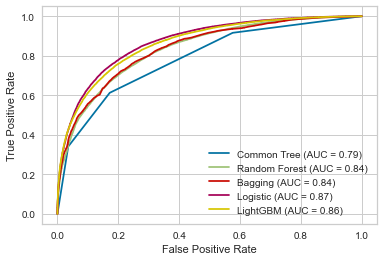

In [206]:
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)
bagging.fit(X_train, y_train)
lgb.fit(X_train, y_train)


fig, ax = plt.subplots()

plot_roc_curve(tree, X_test, y_test, name='Common Tree', ax=ax)
plot_roc_curve(forest, X_test, y_test, name='Random Forest', ax=ax)
plot_roc_curve(bagging, X_test, y_test, name='Bagging', ax=ax)
plot_roc_curve(logistic, X_test, y_test, name='Logistic', ax=ax)
plot_roc_curve(lgb, X_test, y_test, name='LightGBM', ax=ax)

plt.legend()
